* gradyear — год выпуска;
* gender — пол;
* age — возраст;
* friends — число друзей в социальной сети;
* basketball, football, soccer, softball, volleyball, swimming, cheerleading, baseball, tennis, sports, cute, sex, sexy, hot, kissed, dance, band, marching, music, rock, god, church, jesus, bible, hair, dress, blonde, mall, shopping, clothes, hollister, abercrombie, die, death, drunk, drugs (переменные с пятой по сороковую) — частота встречаемости соответствующих слов в сообщениях подростка.

In [84]:
# !pip install numpy==1.24.4
# !pip install scikit-learn==1.2.2
# 1.24.2
# 1.2.2

In [108]:
import pandas as pd
from sklearn.preprocessing import StandardScaler # Стандартзация данных
from sklearn.cluster import KMeans # Кластеризация
from sklearn.mixture import GaussianMixture # Кластеризация
from sklearn.metrics import silhouette_score # импортируем метрику силуэт

# Графика
import matplotlib.pyplot as plt
import seaborn as sns

# import sklearn
# print(sklearn.__version__) # было 1.3.2  нужно 1.2.2
import numpy as np
print(np.__version__) # 1.24.4  1.24.2

# # Деление выборки
# from sklearn.model_selection import train_test_split

# from sklearn.linear_model import LogisticRegression #линейные модели
# from sklearn import tree #деревья решений
# from sklearn.ensemble import RandomForestClassifier, StackingClassifier# онсамбли
# from sklearn.naive_bayes import GaussianNB
# from sklearn.neighbors import KNeighborsClassifier

# # import xgboost as xgb
# # import catboost as cat

# from sklearn.metrics import f1_score, make_scorer #метрики

1.24.4


In [86]:
df = pd.read_csv('../../data/snsdata.zip')
df_sns = df.copy()
df.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [87]:
# df.info()
# print(df.isnull().sum().sum(),': суммарно пропусков в данных')
# 7810 : суммарно пропусков в данных

### Задание 4.1
Мы будем реализовывать алгоритм только на признаках, которые заключают в себе ключевые слова, встречающиеся в сообщениях подростка. Удалите все остальные признаки. Какова размерность вашего текущего набора данных?

In [88]:
# Эталон
df_sns = df_sns.iloc[:, 4:]
df_sns.shape

(30000, 36)

In [89]:
df=df.drop(['gradyear','gender','age','friends'],axis=1)
print('Количество признаков: ',df.shape[1])
print('Количество наблюдений: ',df.shape[0])

Количество признаков:  36
Количество наблюдений:  30000


### Задание 4.2
Теперь нормализуйте данные с помощью StandardScaler(). Для получившейся матрицы нормализованных признаков выведите самое первое значение в самой первой строке (X_norm[0][0]). Ответ округлите до двух знаков после точки-разделителя.

In [90]:
# StandardScaler подходит для нормально распределённых данных. Он сохраняет исходное распределение и не меняет форму, но чувствителен к выбросам и не подходит для данных с негауссовским распределением. 1
# MinMaxScaler масштабирует признаки в заданный диапазон, сохраняя взаимосвязи. Он не искажает исходное распределение, но чувствителен к выбросам и не эффективно обрабатывает данные с крайними выбросами. 1
# RobustScaler эффективно работает с данными с выбросами. 14 Для масштабирования он использует медиану и межквартильный диапазон, что позволяет обрабатывать признаки с большим количеством выбросов без влияния на них.
# Так как имеются выбросы применим RobustScaler
scaler = StandardScaler()
X_scaler = scaler.fit_transform(df)
display(scaler)
print(round(X_scaler[0,0],2), ' самое первое значение в самой первой строке (X_norm[0][0])')

StandardScaler()

-0.33  самое первое значение в самой первой строке (X_norm[0][0])


In [91]:
# Эталон
X = df_sns.values
scaler = StandardScaler()
scaler.fit(X)
X_norm = scaler.transform(X)
X_norm[0][0]

-0.3322172643985876

### Задание 4.3
Реализуйте алгоритм k-means c девятью кластерами. В качестве значения параметра random_state возьмите число 42. Выведите получившееся значение инерции (model.inertia_). Ответ округлите до двух знаков после точки-разделителя.

In [92]:
model = KMeans(n_clusters=9, random_state=42)
model.fit(X_scaler)
print(round(model.inertia_ ,2), ' значение инерции (model.inertia_)')
# Был 857169.1033997746 из за библиотеки

c:\Users\Temnykov\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


857169.1  значение инерции (model.inertia_)


In [93]:
# Эталон
model = KMeans(n_clusters=9, random_state=42)
model.fit(X_norm)
model.inertia_

c:\Users\Temnykov\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


857169.1033997746

### Задание 4.4
Сколько подростков относится к наиболее многочисленному кластеру?

In [94]:
y_predict=model.predict(X_scaler)
pd.DataFrame(y_predict).value_counts()

0    19659
3     4490
7     2098
1      930
4      851
6      762
8      716
5      493
2        1
Name: count, dtype: int64

In [95]:
# Эталон
df_sns.loc[:, 'label'] = model.labels_
df_sns.label.value_counts()

label
0    19659
3     4490
7     2098
1      930
4      851
6      762
8      716
5      493
2        1
Name: count, dtype: int64

### Задание 4.5
#### 1. Мы выделили девять кластеров, но, возможно, это далеко не оптимальное количество. Давайте попробуем применить разные методы для нахождения числа кластеров. Будем выбирать количество кластеров из диапазона от 3 до 9.

Для начала примените метод локтя. Каким в этом случае будет оптимальное число кластеров? Если оно не идентифицируется однозначно, запишите количество кластеров, при котором достигается наименьшая инерция.

c:\Users\Temnykov\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Temnykov\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Temnykov\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Temnykov\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

<Axes: xlabel='cluster', ylabel='inertia'>

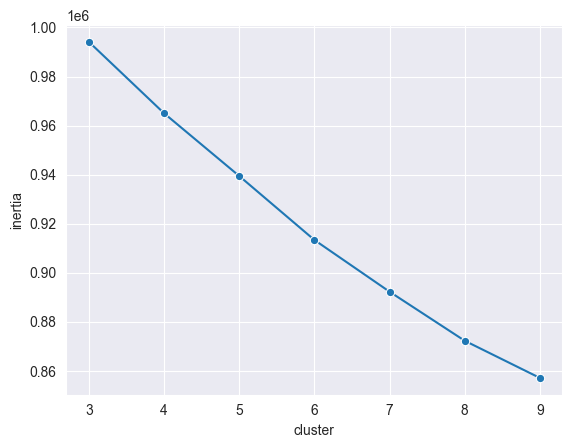

In [96]:
def get_inertia(cluster_num, X):
# инициализируем алгоритм кластеризации
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
# запускаем алгоритм k-means
    k_means.fit(X)
# находим значение инерции
    inertia = k_means.inertia_
# возвращаем значение инерции
    return inertia

# создадим пустой словарь, ключами будут инерция и количество кластеров
res = {"inertia": [], "cluster": []}


# итерируемся по разным размерам кластеров (от 1 до 9) и сохраним значение инерции для каждого кластера
for cluster_num in range(3, 10):
# сохраняем значения
    res["inertia"].append(get_inertia(cluster_num, X_scaler))
    res["cluster"].append(cluster_num)

# сохраним в датафрейм значение инерции и количество кластеров
res_df = pd.DataFrame(res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=res_df, x="cluster", y="inertia", marker= "o")

#### 2. Теперь попробуйте подобрать оптимальное количество кластеров с помощью коэффициента силуэта. Каким оно будет?

Если невозможно однозначно определить количество кластеров, при котором достигается максимальное значение коэффициента силуэта, выберите наименьшее количество кластеров из подходящих.

c:\Users\Temnykov\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Temnykov\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Temnykov\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Temnykov\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

<Axes: xlabel='cluster', ylabel='silhouette'>

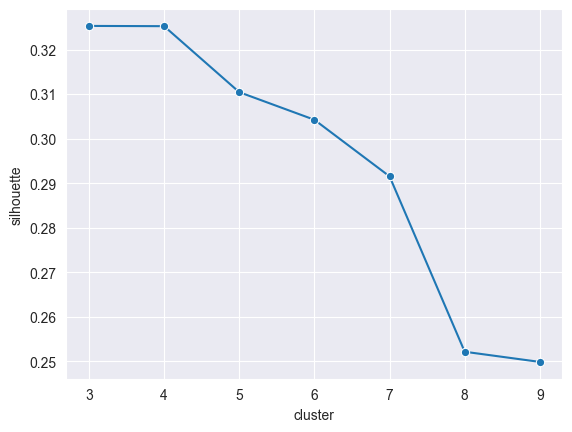

In [97]:
# напишем функцию, как и при подсчете метода локтя
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)# (n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}


# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

for cluster_num in range(3, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X_scaler))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

c:\Users\Temnykov\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Temnykov\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Temnykov\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Temnykov\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

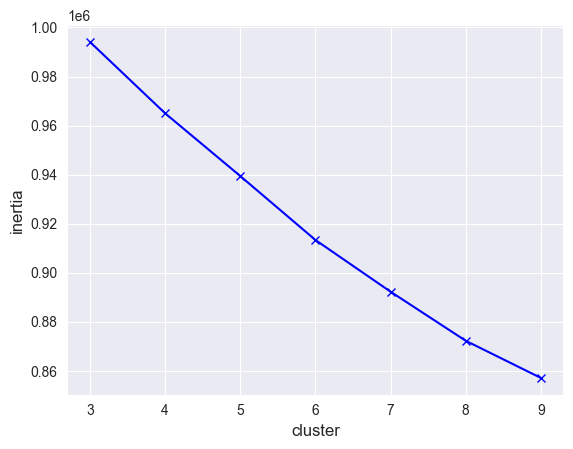

In [98]:
# Эталон
def get_inertia(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
    inertia = k_means.inertia_
    return inertia
 
inertia = []
for cluster_num in range(3, 10):
    inertia.append(get_inertia(cluster_num, X_norm))
 
plt.xlabel("cluster", fontsize=12)
plt.ylabel("inertia", fontsize=12)
plt.plot([i for i in range(3, 10)], inertia, 'xb-')

c:\Users\Temnykov\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Temnykov\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Temnykov\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Temnykov\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

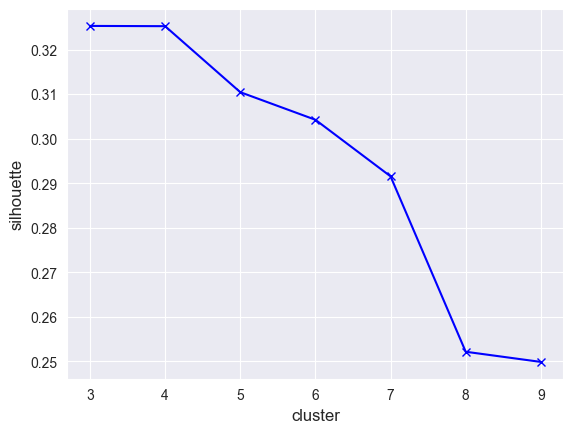

In [99]:
# Эталон
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
    silhouette = silhouette_score(X, k_means.labels_, metric='euclidean')
    return silhouette

silhouettes = []
for i in range(3, 10):
    silhouettes.append(get_silhouette(i, X_norm))
    
plt.xlabel("cluster", fontsize=12)
plt.ylabel("silhouette", fontsize=12)
plt.plot([i for i in range(3, 10)], silhouettes, 'xb-')

### Задание 4.6
Мы будем использовать результаты, полученные в предыдущем задании с помощью коэффициента силуэта.

Реализуйте сегментацию подростков на выбранном количестве кластеров.

Для каждого кластера составьте топ-10 самых частых слов, назовём их ключевыми. Для этого сгруппируйте данные по кластерам, в каждом кластере вычислите среднее по каждому признаку, отсортируйте данные по убыванию и выделите первые 10 строк.

Найдите среди ключевых слов те, которые характерны для каждого кластера, то есть встречаются в каждом из них.

In [100]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(X_scaler)
y_predict = model.predict(X_scaler)

c:\Users\Temnykov\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [101]:
a=set(df.columns)
for i in range(3):
    temp=df[y_predict==i].mean()
    a=a&set(temp.sort_values(ascending=False).head(10).index)
a

{'dance', 'god', 'hair', 'music'}

In [102]:
df['label']=y_predict

In [103]:
# Эталон
top_list = []
for label, group in df.groupby('label'):
    means = group.iloc[:,:-1].mean().sort_values(ascending=False)
    top_5 = set(means.head(10).index)
    top_list.append(top_5)

set.intersection(*top_list)

{'dance', 'god', 'hair', 'music'}

### Задание 4.7
Итак, с k-means мы потренировались — теперь перейдём к EM-алгоритму.

Реализуйте EM-алгоритм (GaussianMixture) для такого же количества кластеров, как и в предыдущем задании. В качестве значения параметра random_state возьмите число 42.

Сколько подростков алгоритм отнёс к самому многочисленному кластеру?

In [104]:
gm = GaussianMixture(n_components=3, random_state=42).fit(X_scaler)
y_predict=gm.predict(X_scaler)
pd.DataFrame(y_predict).value_counts()

0    23426
1     6573
2        1
Name: count, dtype: int64

In [109]:
# Эталон
model = GaussianMixture(n_components=3, random_state=42)
predictions = model.fit_predict(X_norm)
np.unique(predictions, return_counts=True)

(array([0, 1, 2], dtype=int64), array([23426,  6573,     1], dtype=int64))

### Задание 4.8
В одном из кластеров оказался всего один человек. Давайте узнаем, что это за подросток и чем он(а) интересуется.

Отметьте три слова, которые чаще всего встречаются в сообщениях этого подростка:

In [110]:
temp=df[y_predict==2].mean()
temp.sort_values(ascending=False).head(3).index

Index(['blonde', 'sex', 'hair'], dtype='object')

In [111]:
# Эталон
a = np.where(predictions == 2)
df_sns.iloc[a]

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,label
14187,0,2,0,0,0,1,0,0,0,0,...,0,0,1,0,0,6,6,6,0,2
